<a href="https://colab.research.google.com/github/contactewere/CHD-Prediction/blob/main/Coronary_Heart_Disease_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries and Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Dataset Upload

In [ ]:
df = pd.read_csv('heart.csv')

Dataset Analysis

In [ ]:
df.shape

(918, 12)

In [ ]:
df.head(6)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
#Checking for duplicates in the dataset
duplicates = df.duplicated()
duplicate_rows = df[df.duplicated()]
duplicate_rows.shape

(0, 12)

In [ ]:
#Checking for missing values
df.isnull().sum().sort_values(ascending = False)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Dataset Visualisation

In [ ]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

<Axes: xlabel='HeartDisease'>

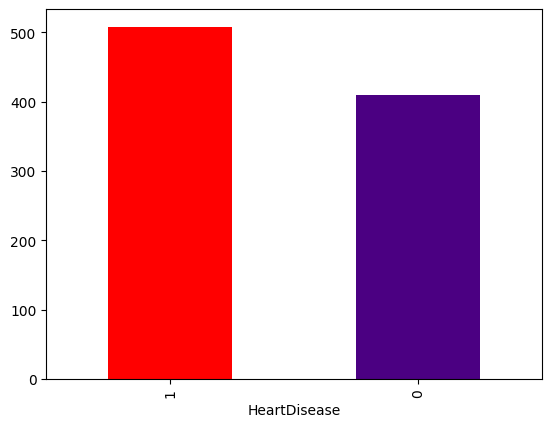

In [ ]:
df['HeartDisease'].value_counts().plot(kind = 'bar', color = ['red','indigo'])

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Text(0.5, 1.0, 'Age Distribution')

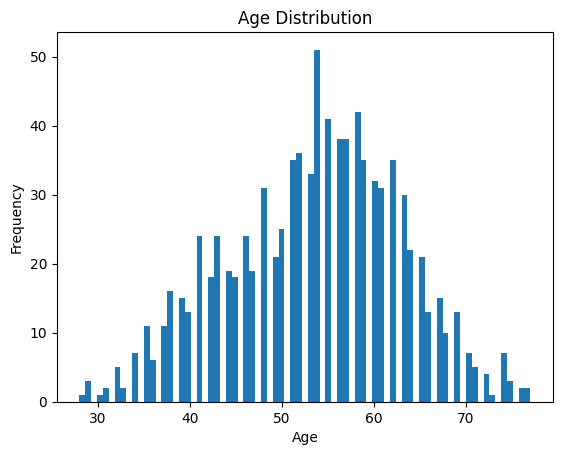

In [ ]:
df['Age'].plot.hist(bins = 77)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title('Age Distribution')

(array([20., 30., 40., 50., 60., 70., 80.]),
 [Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80')])

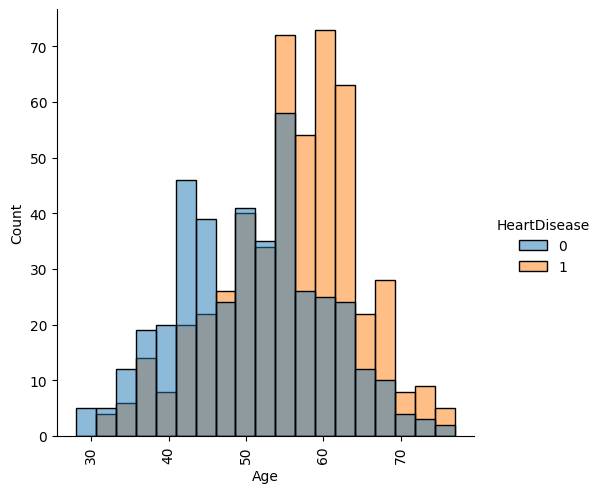

In [ ]:
sns.displot(data = df, hue= 'HeartDisease', x = 'Age')
plt.xticks(rotation=90)

<ipython-input-14-83ddeb82e863>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_heart_failure_counts, x='age_group', y='HeartDisease', palette='coolwarm')


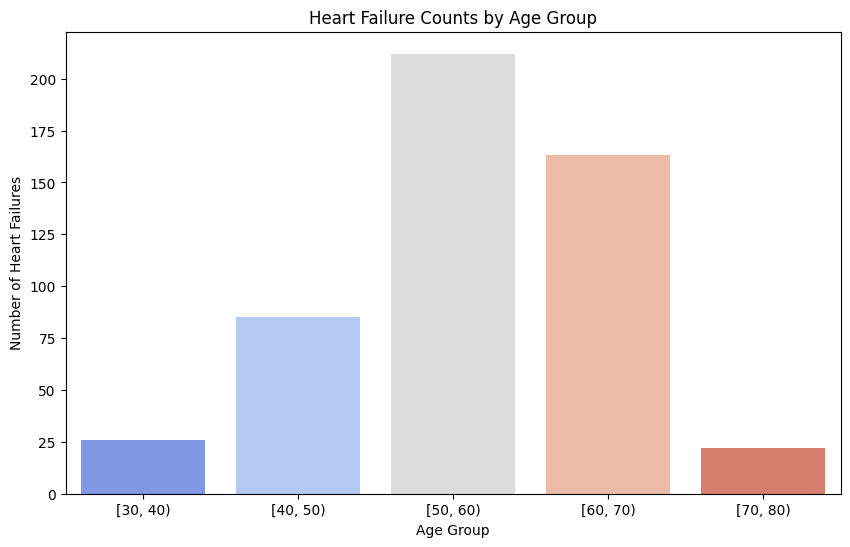

In [ ]:
df['age_group'] = pd.cut(df['Age'], bins=[30, 40, 50, 60, 70, 80], right=False)
age_heart_failure_counts = df.groupby('age_group')['HeartDisease'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=age_heart_failure_counts, x='age_group', y='HeartDisease', palette='coolwarm')
plt.title('Heart Failure Counts by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Heart Failures')
plt.show()

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '[25, 35)'),
  Text(1, 0, '[35, 45)'),
  Text(2, 0, '[45, 55)'),
  Text(3, 0, '[55, 65)'),
  Text(4, 0, '[65, 75)'),
  Text(5, 0, '[75, 85)')])

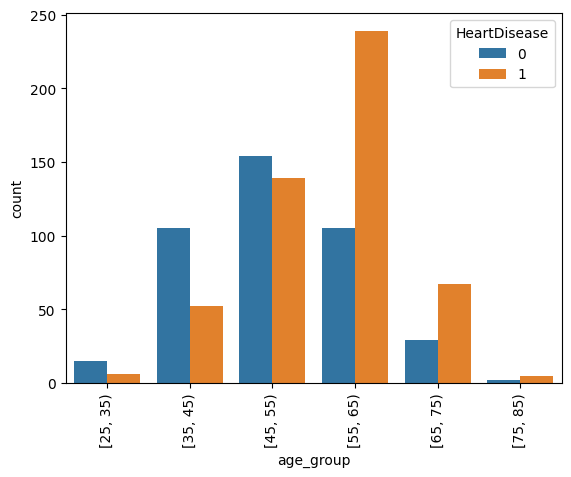

In [ ]:
df['age_group'] = pd.cut(df['Age'], bins=[25, 35, 45, 55, 65, 75, 85], right=False)
sns.countplot(data = df, hue= 'HeartDisease', x = 'age_group')
plt.xticks(rotation=90)

<ipython-input-16-7a75b3d34bc1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='ChestPainType', data = df, palette = 'cool')


Text(0.5, 1.0, 'Chest Pain Type')

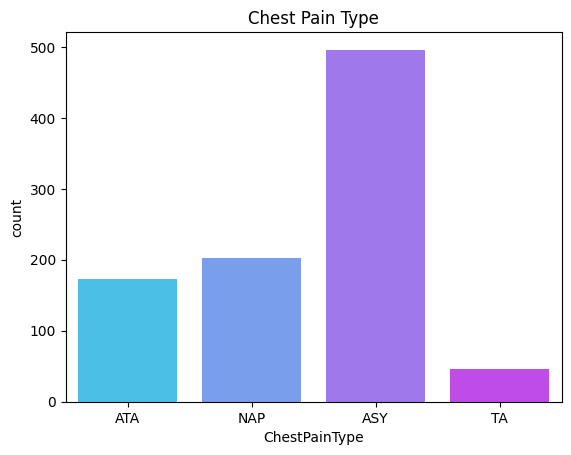

In [ ]:
sns.countplot(x ='ChestPainType', data = df, palette = 'cool')
plt.title('Chest Pain Type')

<Axes: xlabel='ChestPainType', ylabel='count'>

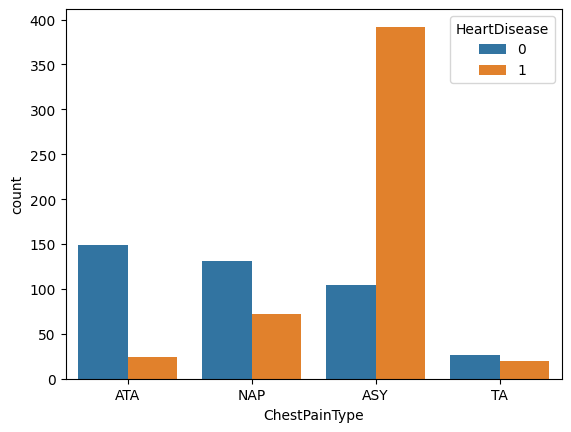

In [ ]:
 sns.countplot(data = df, hue= 'HeartDisease', x = 'ChestPainType')

<Axes: xlabel='ST_Slope', ylabel='count'>

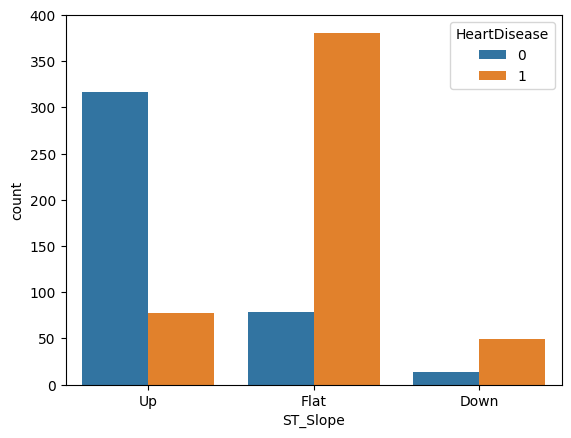

In [ ]:
sns.countplot(data = df, hue= 'HeartDisease', x = 'ST_Slope')

<ipython-input-19-73d5b45c1793>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ST_Slope', data = df, palette ='dark')


Text(0.5, 1.0, 'Distribution of ST Slope')

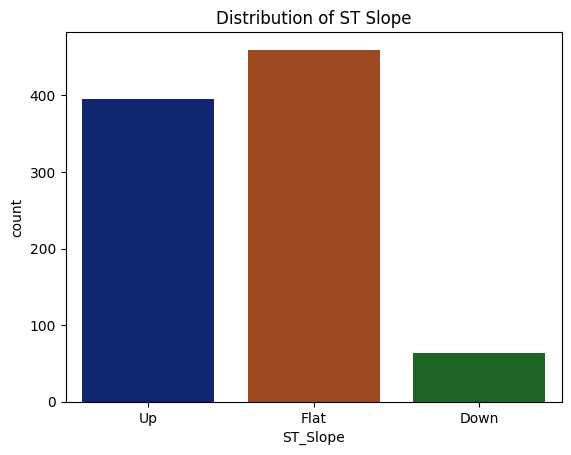

In [ ]:
sns.countplot(x='ST_Slope', data = df, palette ='dark')
plt.title('Distribution of ST Slope')

<ipython-input-20-83f1eb602c2d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ExerciseAngina', data = df, palette = 'cool')


Text(0.5, 1.0, 'Distribution of Exercise Angina')

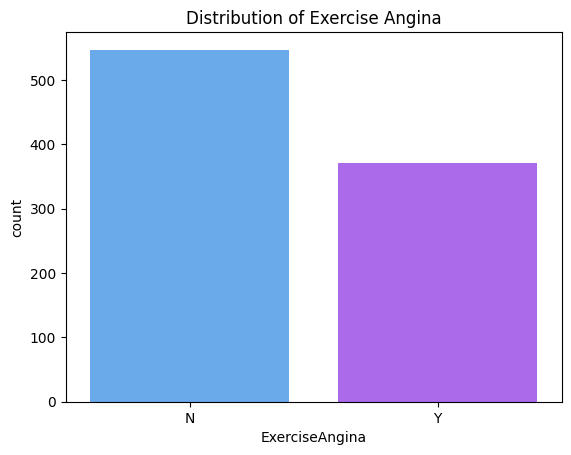

In [ ]:
sns.countplot(x='ExerciseAngina', data = df, palette = 'cool')
plt.title('Distribution of Exercise Angina')

<Axes: xlabel='ExerciseAngina', ylabel='count'>

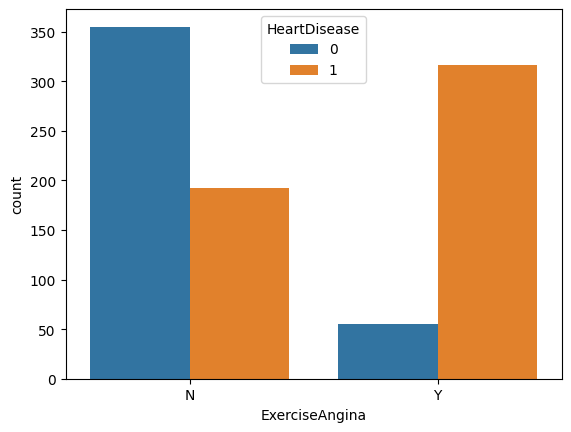

In [ ]:
sns.countplot(data = df, hue= 'HeartDisease', x = 'ExerciseAngina')

Text(0.5, 1.0, 'Cholesterol Distribution')

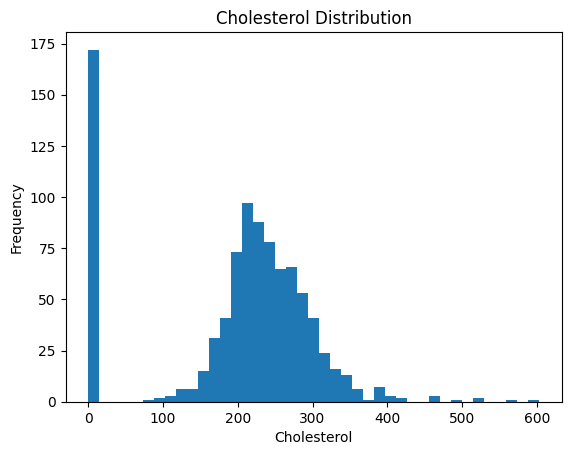

In [ ]:
df['Cholesterol'].plot.hist(bins = 41)
plt.xlabel("Cholesterol")
plt.ylabel("Frequency")
plt.title('Cholesterol Distribution')

<ipython-input-23-64e7f8a8aa37>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data = df, palette = 'cool')


Text(0.5, 1.0, 'Sex Frequency Distrubtion')

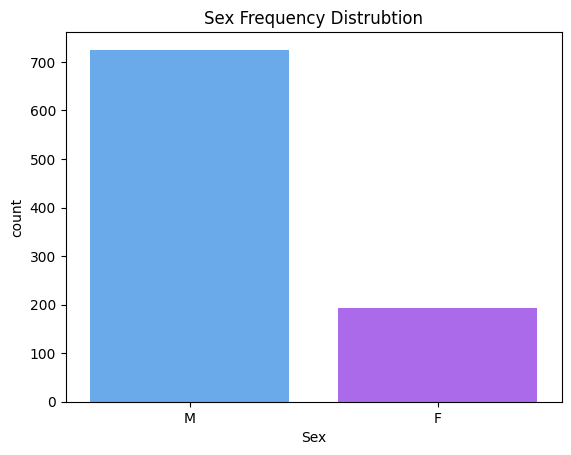

In [ ]:
sns.countplot(x='Sex', data = df, palette = 'cool')
plt.title('Sex Frequency Distrubtion')

Text(0.5, 1.0, 'RestingBP Distribution')

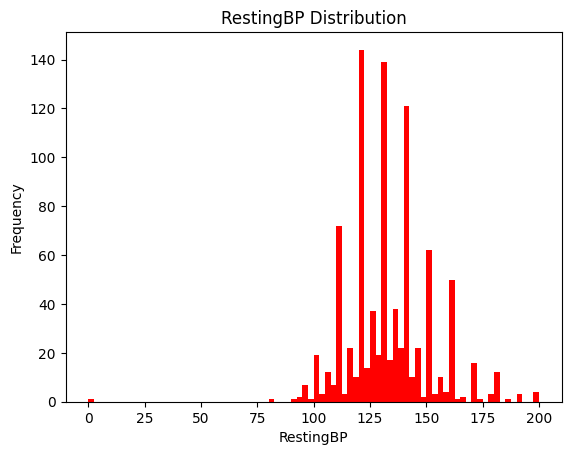

In [ ]:
df['RestingBP'].plot.hist(bins = 80, color = "red")
plt.xlabel("RestingBP")
plt.ylabel("Frequency")
plt.title('RestingBP Distribution')

<ipython-input-25-5cfe71a431f2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FastingBS', data = df, palette = 'cool')


Text(0.5, 1.0, 'FastingBS Distribution')

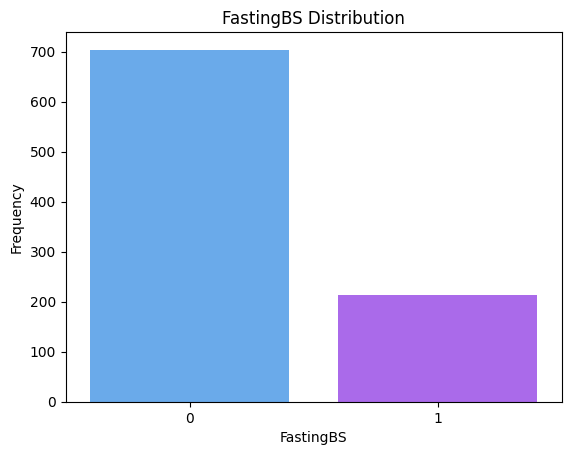

In [ ]:
sns.countplot(x='FastingBS', data = df, palette = 'cool')
plt.xlabel("FastingBS")
plt.ylabel("Frequency")
plt.title('FastingBS Distribution')

Text(0.5, 1.0, 'MaxHR Distribution')

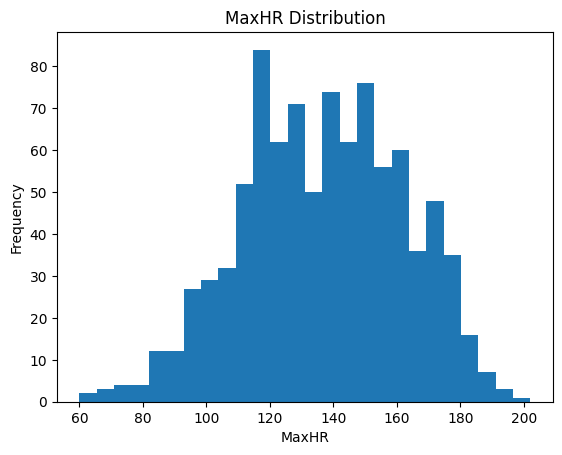

In [ ]:
df['MaxHR'].plot.hist(bins = 26)
plt.xlabel("MaxHR")
plt.ylabel("Frequency")
plt.title('MaxHR Distribution')

Text(0.5, 1.0, 'Oldpeak Distribution')

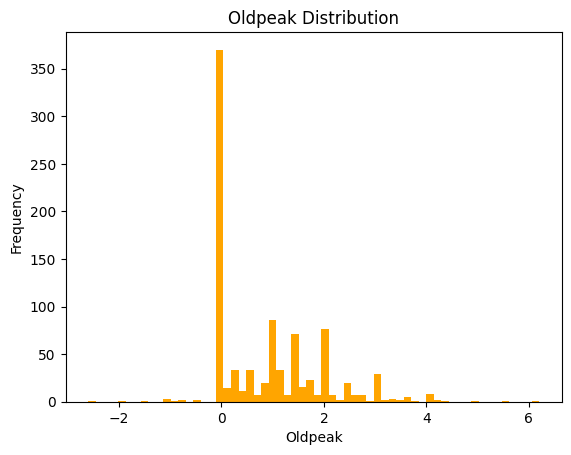

In [ ]:
df['Oldpeak'].plot.hist(bins = 60, color = 'orange')
plt.xlabel("Oldpeak")
plt.ylabel("Frequency")
plt.title('Oldpeak Distribution')

<ipython-input-28-5c32216b2e2b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RestingECG', data = df, palette = 'cool')


Text(0.5, 1.0, 'Distribution of Resting ECG')

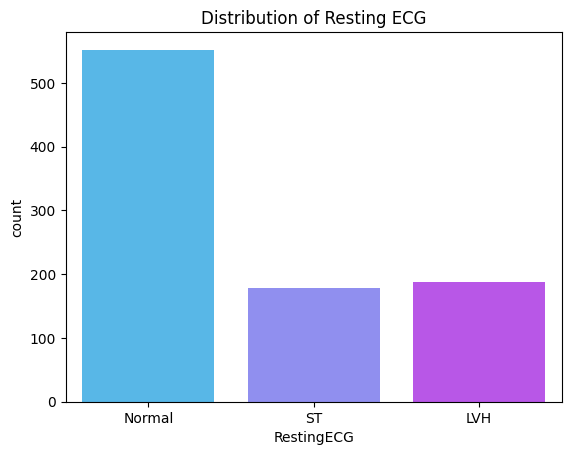

In [ ]:
sns.countplot(x='RestingECG', data = df, palette = 'cool')
plt.title('Distribution of Resting ECG')

Text(0.5, 1.0, 'Resting ECG Result in Comparison with Heart Disease')

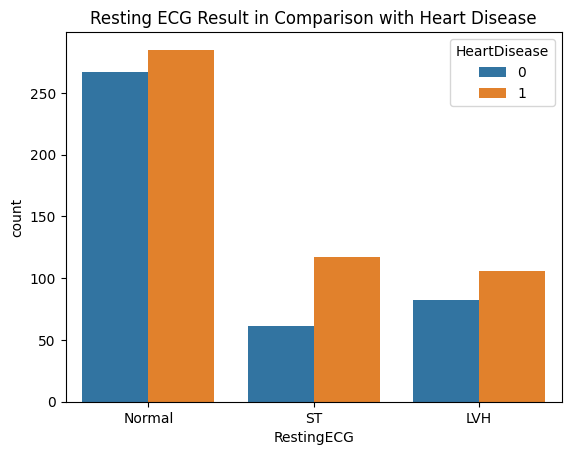

In [ ]:
sns.countplot(x='RestingECG', data = df, hue = 'HeartDisease')
plt.title('Resting ECG Result in Comparison with Heart Disease')

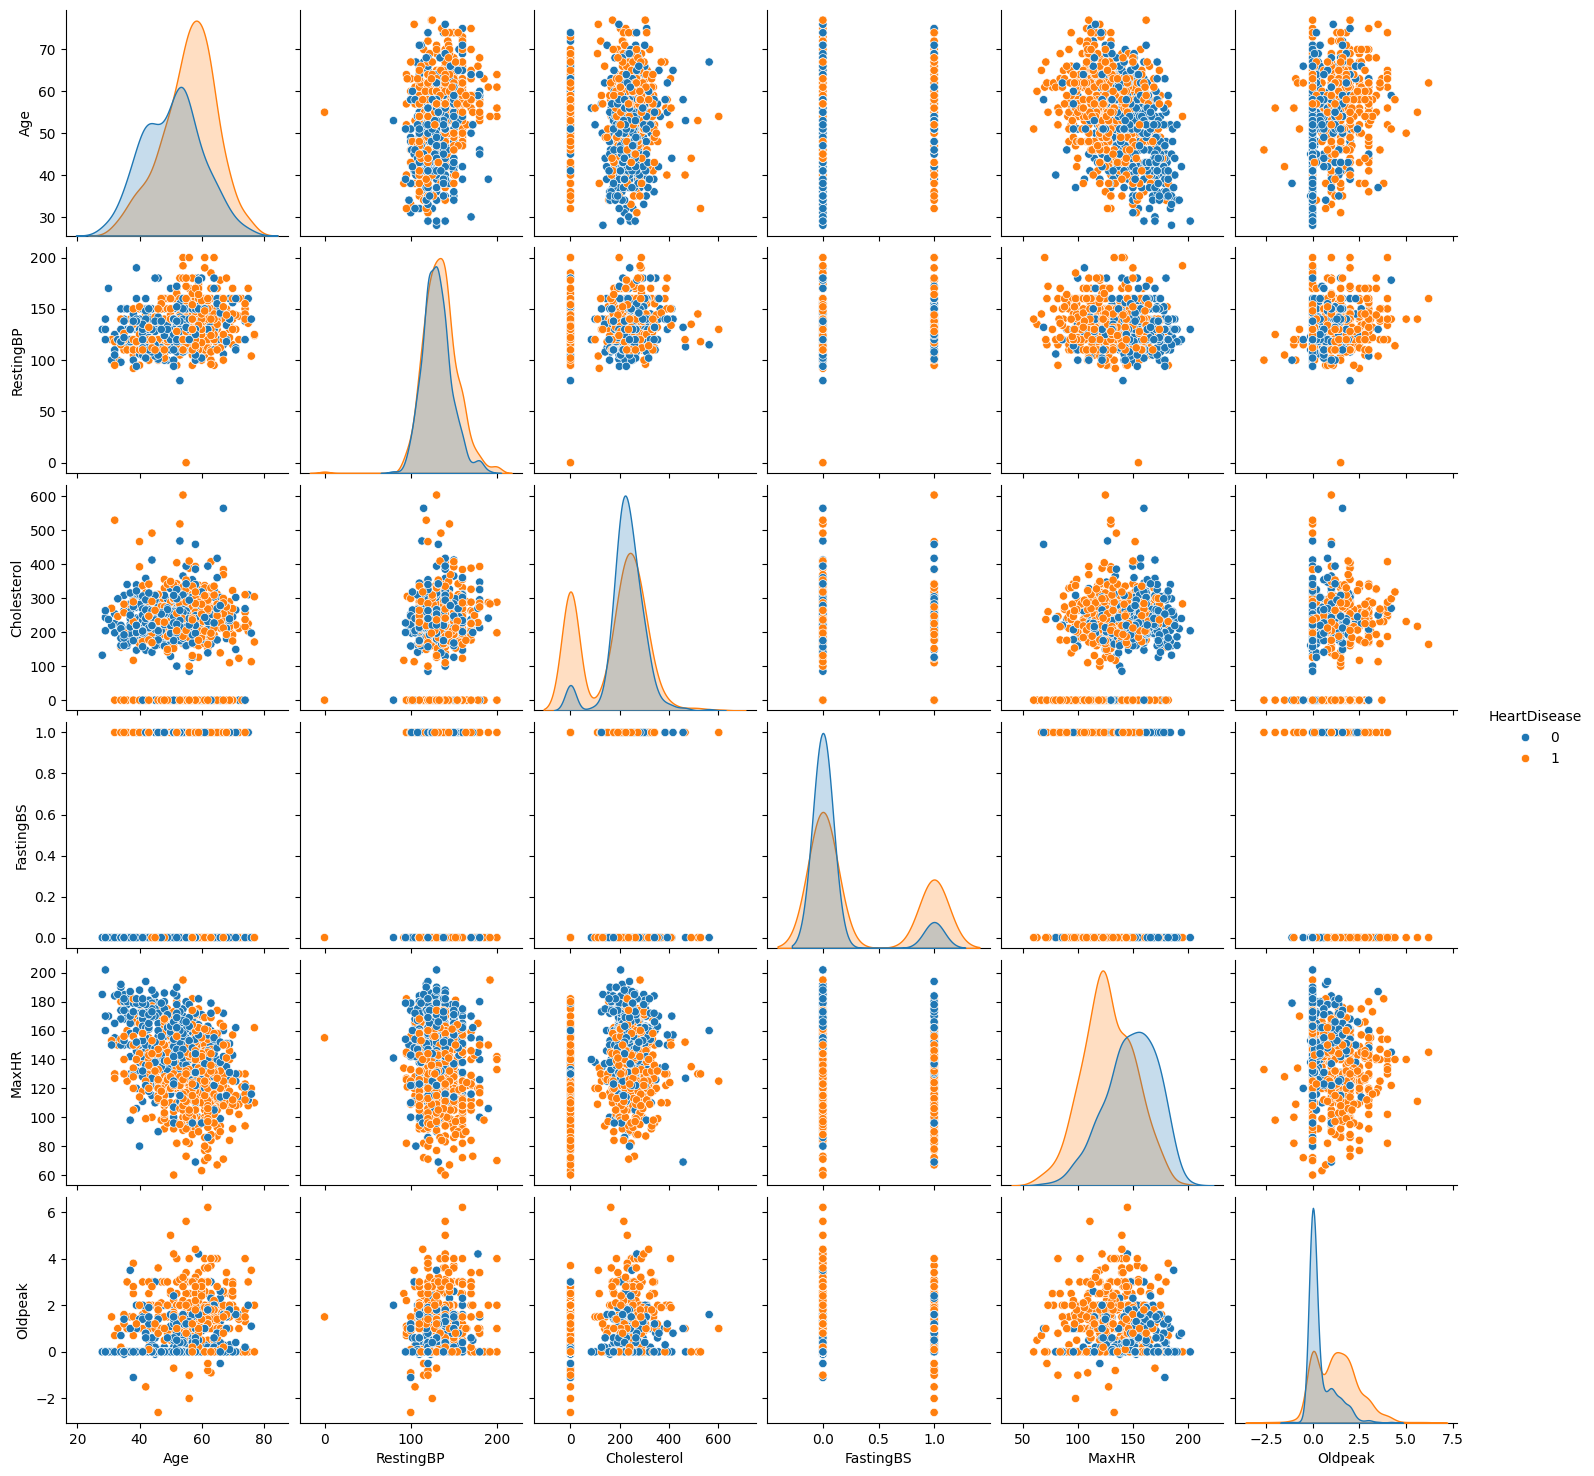

In [ ]:
sns.pairplot(data = df, hue = 'HeartDisease')

<ipython-input-31-d8bb3df5ddc1>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


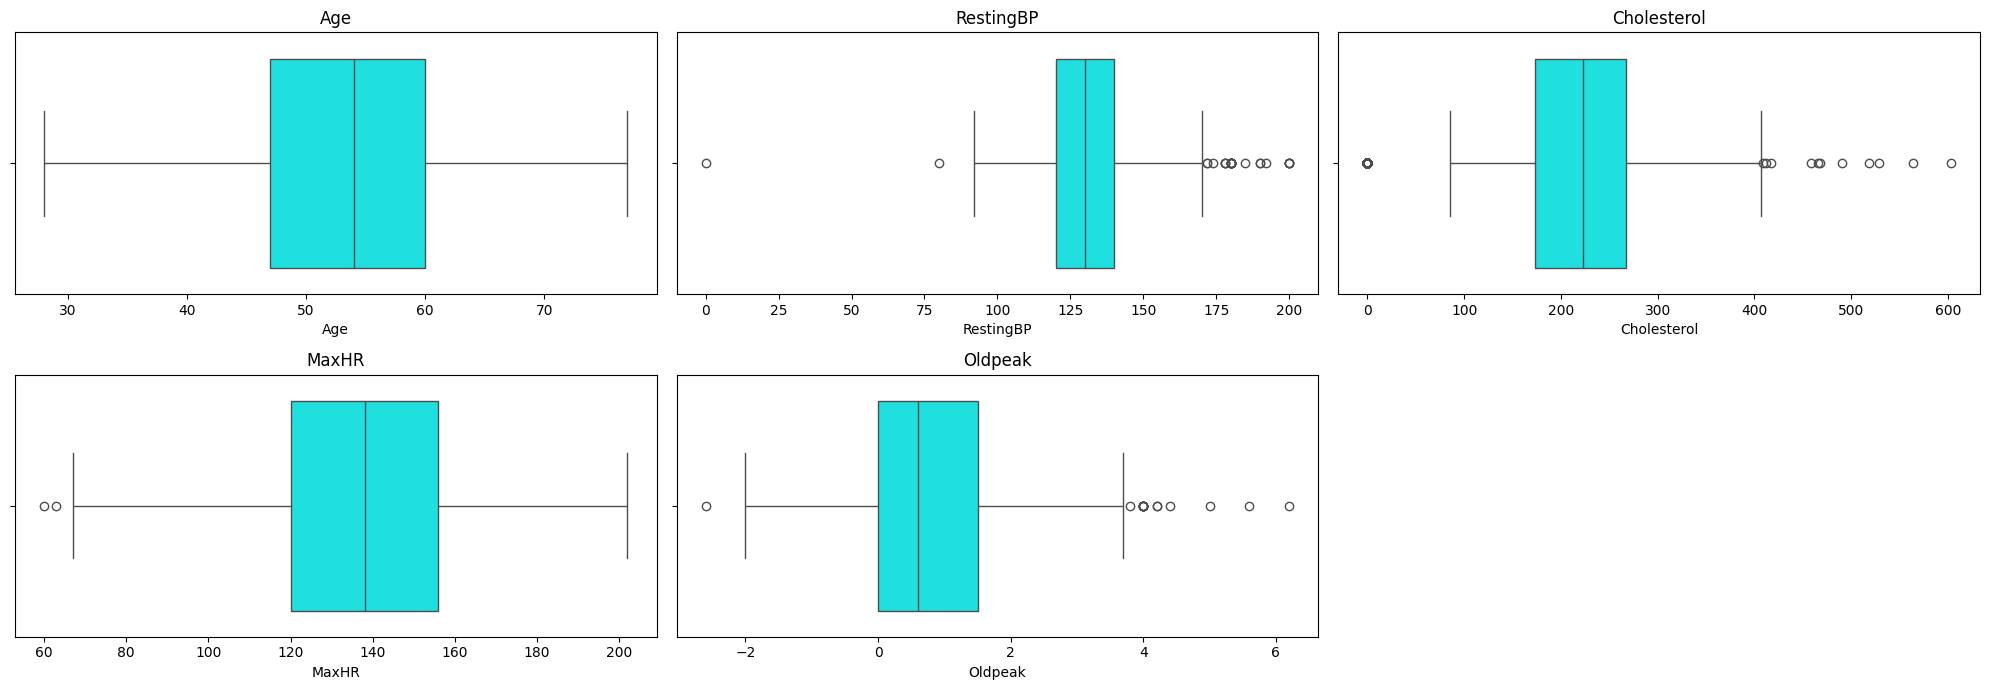

In [ ]:
column=['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
plt.figure(figsize=(20,7))
plt.title("Numerical Data with box plot")
for i,category in enumerate(column):
  plt.subplot(2,3,i+1)
  sns.boxplot(data=df[category],color='cyan',orient="h")
  plt.title(category)
  plt.tight_layout()
plt.show()

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

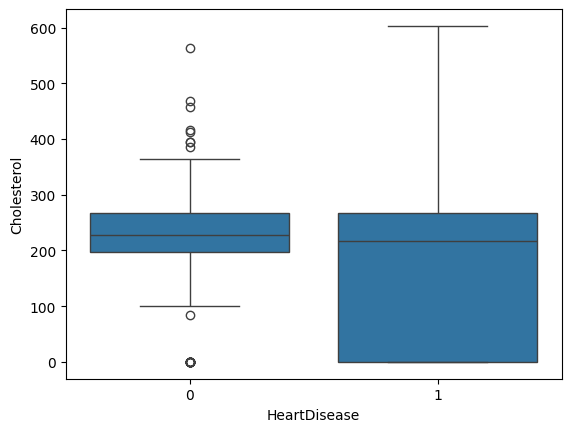

In [ ]:
sns.boxplot(data = df, x ='HeartDisease', y = 'Cholesterol')

<Axes: xlabel='HeartDisease', ylabel='MaxHR'>

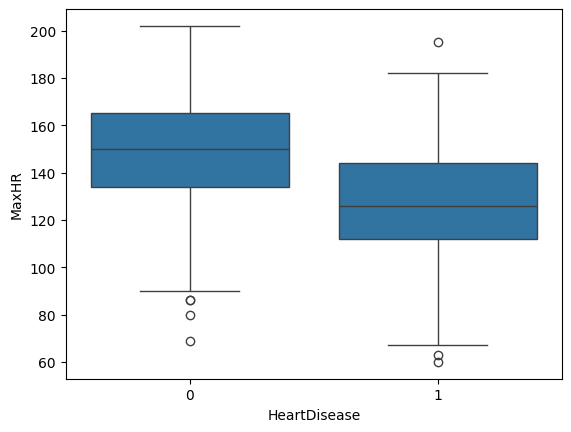

In [ ]:
sns.boxplot(data = df, x ='HeartDisease', y ="MaxHR")

<Axes: xlabel='HeartDisease', ylabel='RestingBP'>

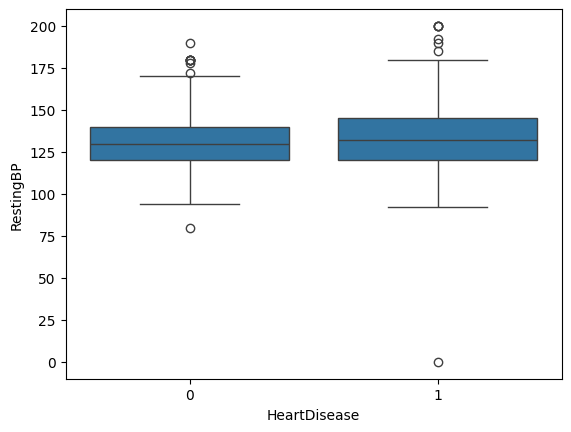

In [ ]:
sns.boxplot(data = df, x ='HeartDisease', y = 'RestingBP')

In [ ]:
# Converting Categorical Data to Numerical
df.Sex.replace({'M':1,'F':0}, inplace = True)
# ChestPainType
df.ChestPainType.replace({'TA':0, 'ATA':1, 'NAP':2, 'ASY':3 }, inplace = True) # RestingECG
df.RestingECG.replace({'Normal':0, 'ST':1, 'LVH':2}, inplace = True) # ExerciseAngina
df.ExerciseAngina.replace({'N':0, 'Y':1}, inplace = True)
# ST_Slope
df.ST_Slope.replace({'Up':0, 'Flat':1, 'Down':2}, inplace = True)

In [ ]:
df = df.drop('age_group', axis =1)

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,0,0
1,49,0,2,160,180,0,0,156,0,1.0,1,1
2,37,1,1,130,283,0,1,98,0,0.0,0,0
3,48,0,3,138,214,0,0,108,1,1.5,1,1
4,54,1,2,150,195,0,0,122,0,0.0,0,0


<Axes: >

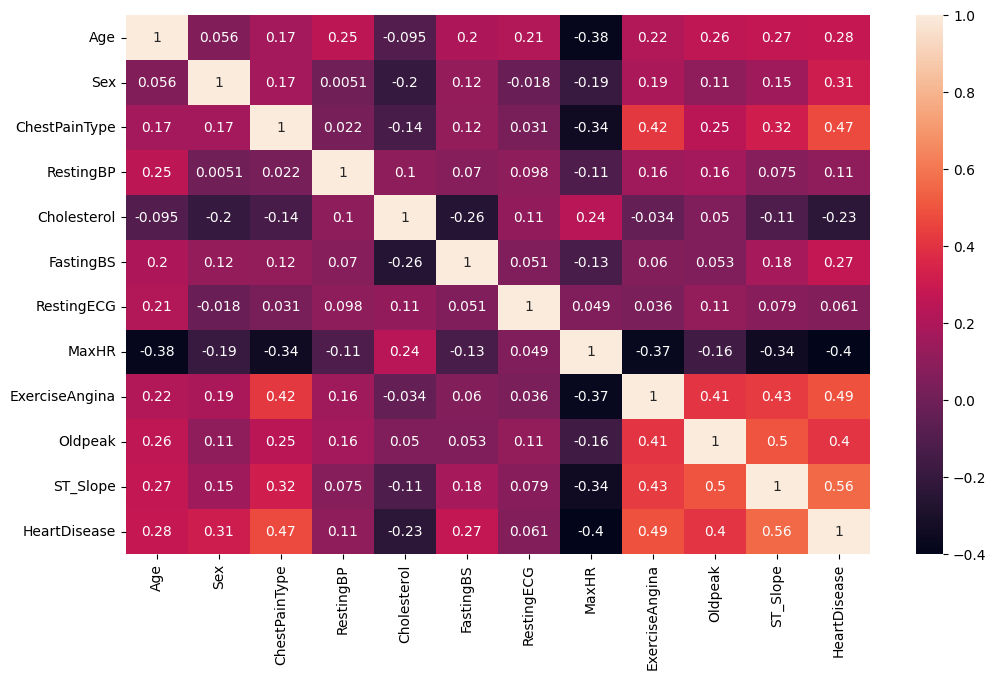

In [ ]:
corr=df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr,annot=True)

FEATURE ENGINEERING

From the EDA conducted, I observed that, the attributes – RestingBP and Cholesterol – have some instances with zero values which are
inconsistent with the attribute values. These are handled as missing values and replaced with the Mean values. While the outliers observed in the following features - Resting BP, Cholesterol, and Old Peak -  were removed.  

In [ ]:
df[df['Cholesterol']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,1,3,115,0,0,0,93,1,0.0,1,1
294,32,1,0,95,0,1,0,127,0,0.7,0,1
295,61,1,3,105,0,1,0,110,1,1.5,0,1
296,50,1,3,145,0,1,0,139,1,0.7,1,1
297,57,1,3,110,0,1,1,131,1,1.4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,1,3,122,0,0,0,120,0,0.5,0,1
515,63,1,2,130,0,1,1,160,0,3.0,1,0
518,48,1,2,102,0,1,1,110,1,1.0,2,1
535,56,1,3,130,0,0,2,122,1,1.0,1,1


In [ ]:
df['Cholesterol'].replace(0, int(df['Cholesterol'].mean()), inplace=True)

In [ ]:
df[df['Cholesterol']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [ ]:
df[df['RestingBP']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,1,2,0,198,0,0,155,0,1.5,1,1


In [ ]:
df['RestingBP'].replace(0, int(df['RestingBP'].mean()), inplace=True)

In [ ]:
df[df['RestingBP']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [ ]:
#Removing Resting BP outliers
Q1 = df['RestingBP'].quantile(0.25)
Q3 = df['RestingBP'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define a range for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df['RestingBP'] >= lower_bound) & (df['RestingBP'] <= upper_bound)]
df_cleaned.shape

(891, 12)

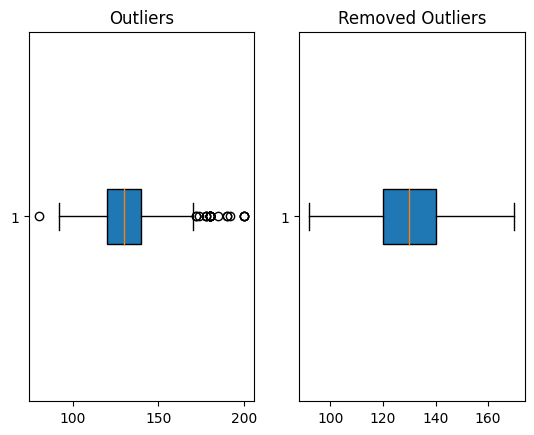

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(1, 2)
ax1.boxplot(df['RestingBP'], patch_artist=True, vert = False)
ax1.set_title('Outliers')
ax2.boxplot(df_cleaned['RestingBP'], patch_artist=True, vert = False)
ax2.set_title('Removed Outliers')
plt.show()

In [ ]:
#Removing Cholesterol outliers
Q1 = df_cleaned['Cholesterol'].quantile(0.25)
Q3 = df_cleaned['Cholesterol'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define a range for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_clean = df_cleaned[(df_cleaned['Cholesterol'] >= lower_bound) & (df_cleaned['Cholesterol'] <= upper_bound)]
df_clean.shape

(870, 12)

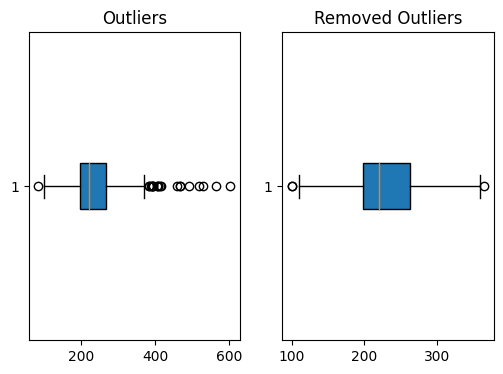

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(6, 4))
ax1.boxplot(df['Cholesterol'], patch_artist=True, vert = False)
ax1.set_title('Outliers')
ax2.boxplot(df_clean['Cholesterol'], patch_artist=True, vert = False)
ax2.set_title('Removed Outliers')
plt.show()

In [ ]:
#Removing Old Peak outliers
Q1 = df_clean['Oldpeak'].quantile(0.25)
Q3 = df_clean['Oldpeak'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define a range for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_new = df_clean[(df_clean['Oldpeak'] >= lower_bound) & (df_clean['Oldpeak'] <= upper_bound)]
df_new.shape

(857, 12)

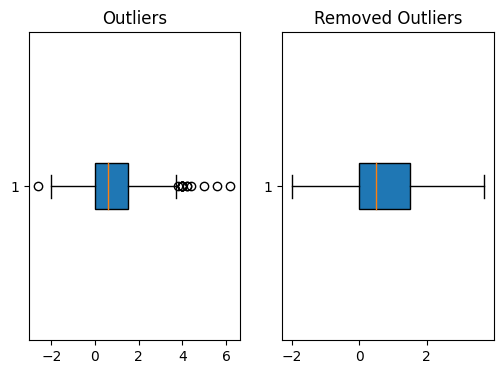

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(6, 4))
ax1.boxplot(df['Oldpeak'], patch_artist=True, vert = False)
ax1.set_title('Outliers')
ax2.boxplot(df_new['Oldpeak'], patch_artist=True, vert = False)
ax2.set_title('Removed Outliers')
plt.show()

In [ ]:
df_new.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,0,0
1,49,0,2,160,180,0,0,156,0,1.0,1,1
2,37,1,1,130,283,0,1,98,0,0.0,0,0
3,48,0,3,138,214,0,0,108,1,1.5,1,1
4,54,1,2,150,195,0,0,122,0,0.0,0,0


In [ ]:
numerical_cols = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df1 = scaler.fit_transform(df_new[numerical_cols])
df1 = pd.DataFrame(df1, columns=numerical_cols)
df1.head()

,RestingBP,Cholesterol,MaxHR,Oldpeak
0,0.575220,1.272110,1.372899,-0.856945
1,1.841014,-1.098832,0.744261,0.173795
2,-0.057677,1.141599,-1.534551,-0.856945
3,0.448640,-0.359272,-1.141652,0.689164
4,1.208117,-0.772555,-0.591594,-0.856945


Modelling

In [ ]:
# Train Test Split (70:30)
X = df_new.drop('HeartDisease', axis=1)
y = df_new['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 47)

In [ ]:
# Defining a function to plot the Receiver Operating Characteristic (ROC) curve
def plot_roc_curve(y_true, y_scores):
    # Calculate the false positive rate (FPR) and true positive rate (TPR)
    fpr, tpr, _ = roc_curve(y_true, y_scores)

    # Calculate the area under the ROC curve (AUC)
    auc = roc_auc_score(y_true, y_scores)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
    #plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[ 86  24]
 [ 22 126]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       110
           1       0.84      0.85      0.85       148

    accuracy                           0.82       258
   macro avg       0.82      0.82      0.82       258
weighted avg       0.82      0.82      0.82       258

ROC_AUC Score :  81.66%


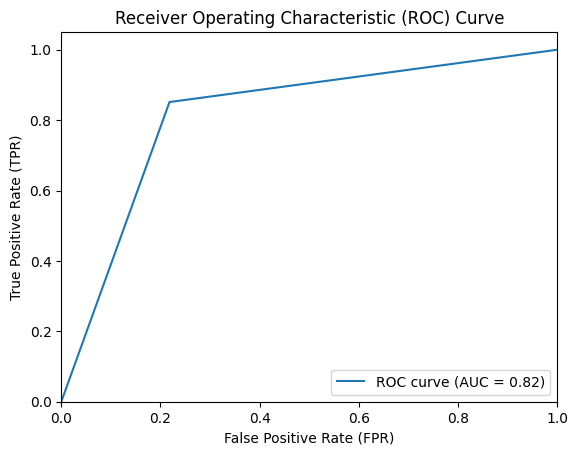

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,predictions)))
plot_roc_curve(y_test, predictions)

[[ 89  21]
 [ 22 126]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       110
           1       0.86      0.85      0.85       148

    accuracy                           0.83       258
   macro avg       0.83      0.83      0.83       258
weighted avg       0.83      0.83      0.83       258

ROC_AUC Score :  83.02%


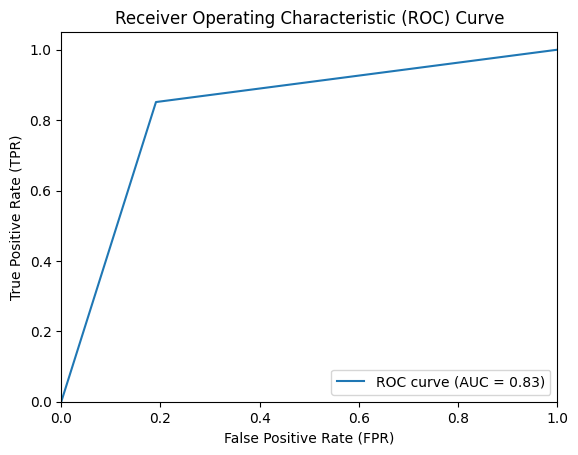

In [ ]:
Rf = RandomForestClassifier(max_depth=6, n_estimators=500, min_samples_split=4)
Rf.fit(X_train, y_train)
predictions = Rf.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,predictions)))
plot_roc_curve(y_test, predictions)

[[ 73  37]
 [ 39 109]]
              precision    recall  f1-score   support

           0       0.65      0.66      0.66       110
           1       0.75      0.74      0.74       148

    accuracy                           0.71       258
   macro avg       0.70      0.70      0.70       258
weighted avg       0.71      0.71      0.71       258

ROC_AUC Score :  70.01%


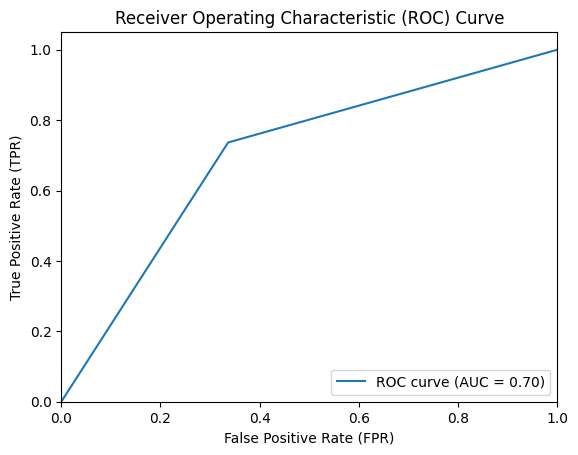

In [ ]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,predictions)))
plot_roc_curve(y_test, predictions)